In [1]:
from matplotlib import pyplot as plt

In [2]:
from periodic_patterns_v2 import TimeStampSetV2

In [3]:
import pandas as pd

In [4]:
import datetime

In [5]:
df = pd.read_csv('proxy_login.log.csv')

In [6]:
df

,timestamp,connectivity,login_redirect,duration,successfully_logged_in
0,2020-06-16 17:43:44.697989,1,0,0.413221,1
1,2020-06-16 17:44:45.111549,1,0,0.404907,1
2,2020-06-16 17:45:45.516516,1,0,0.397478,1
3,2020-06-16 17:46:45.915872,1,0,0.400688,1
4,2020-06-16 17:47:46.317341,1,0,0.391693,1
...,...,...,...,...,...
199682,2020-09-14 10:47:23.699560,1,0,0.411656,1
199683,2020-09-14 10:47:54.111404,1,0,0.402895,1
199684,2020-09-14 10:48:24.515735,1,0,25.525615,1
199685,2020-09-14 10:49:20.041369,0,0,45.020597,0


In [7]:
timestamps = pd.to_datetime(df[df['connectivity'] == 0]['timestamp']).tolist()

In [8]:
tss = TimeStampSetV2()
tss.add(*timestamps)

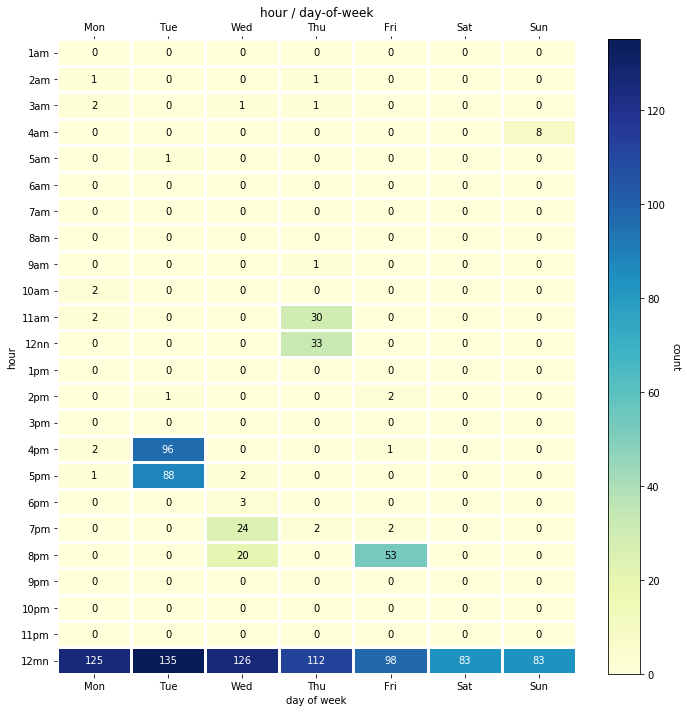

In [9]:
tss.hour_of_day.plot()

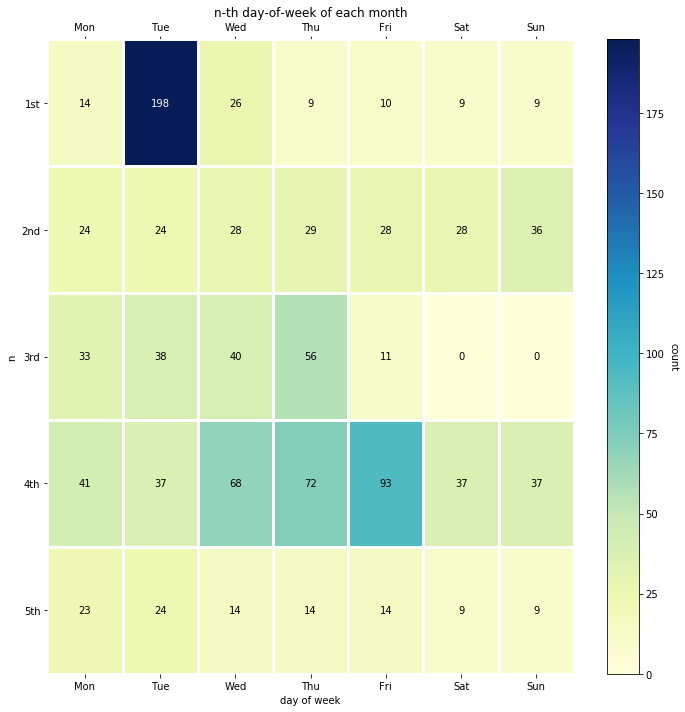

In [10]:
tss.nth_day_of_month.plot()

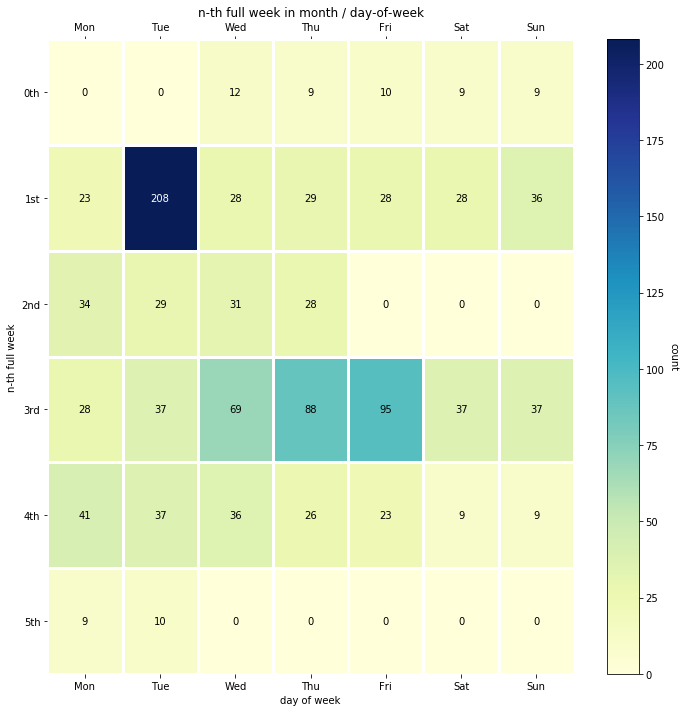

In [11]:
tss.full_week_of_month.plot()

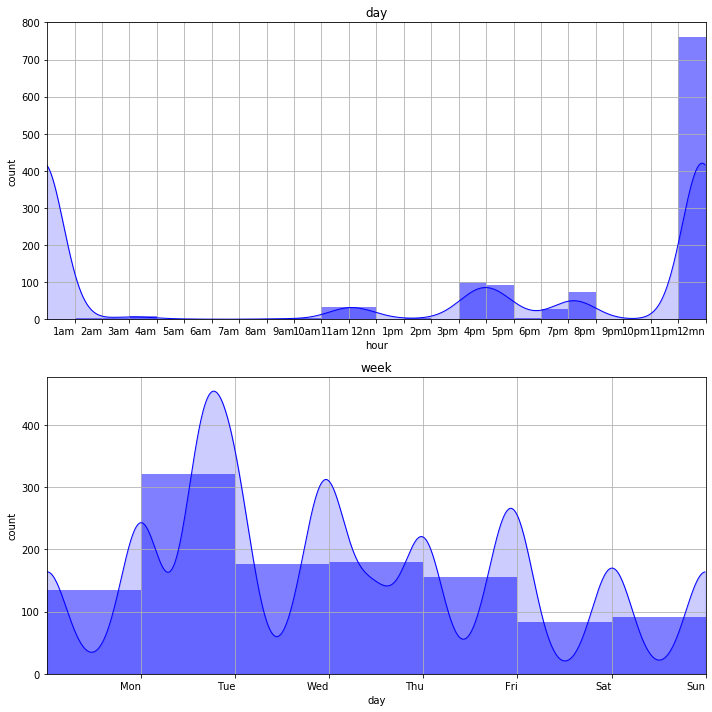

In [12]:
tss.plot(clear=False)

In [19]:
for i in range(1,61):
    print(i, len(tss.sessions(datetime.timedelta(minutes=i))))

1 827
2 94
3 94
4 94
5 94
6 93
7 93
8 93
9 92
10 92
11 92
12 92
13 90
14 90
15 90
16 90
17 90
18 90
19 90
20 90
21 90
22 90
23 90
24 90
25 89
26 89
27 89
28 89
29 88
30 88
31 88
32 88
33 88
34 88
35 88
36 88
37 88
38 87
39 87
40 87
41 87
42 87
43 87
44 87
45 87
46 87
47 86
48 86
49 86
50 86
51 86
52 86
53 86
54 86
55 86
56 86
57 86
58 86
59 86
60 86


In [20]:
tss2 = TimeStampSetV2()
tss2.add(*[session[0] for session in tss.sessions(datetime.timedelta(minutes=60))])

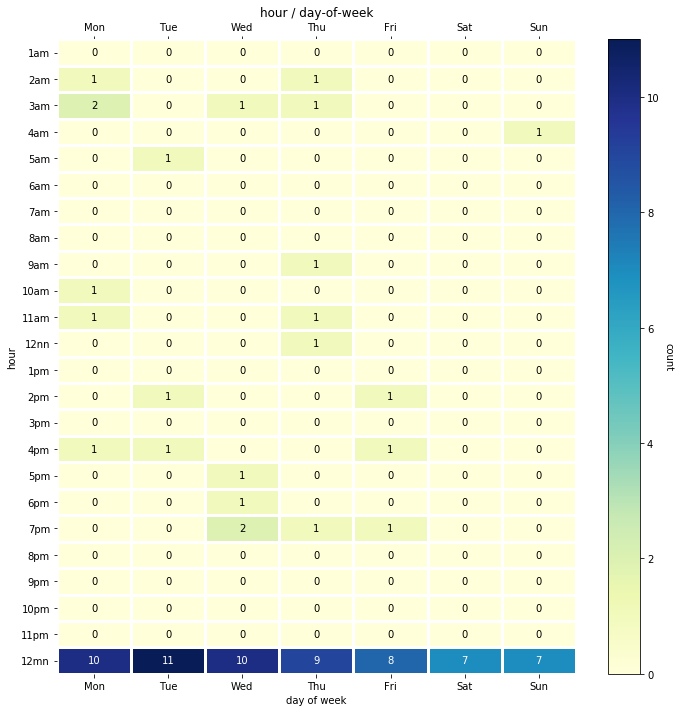

In [21]:
tss2.hour_of_day.plot()

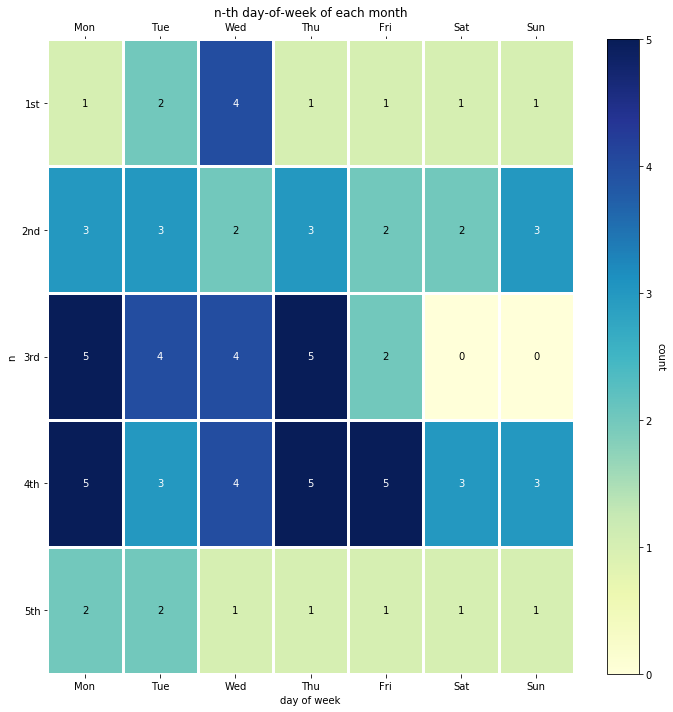

In [22]:
tss2.nth_day_of_month.plot()

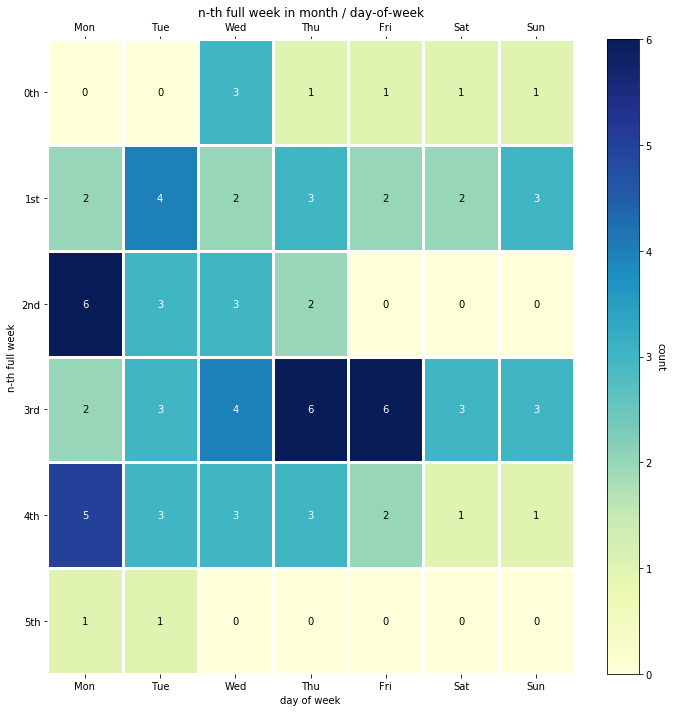

In [23]:
tss2.full_week_of_month.plot()

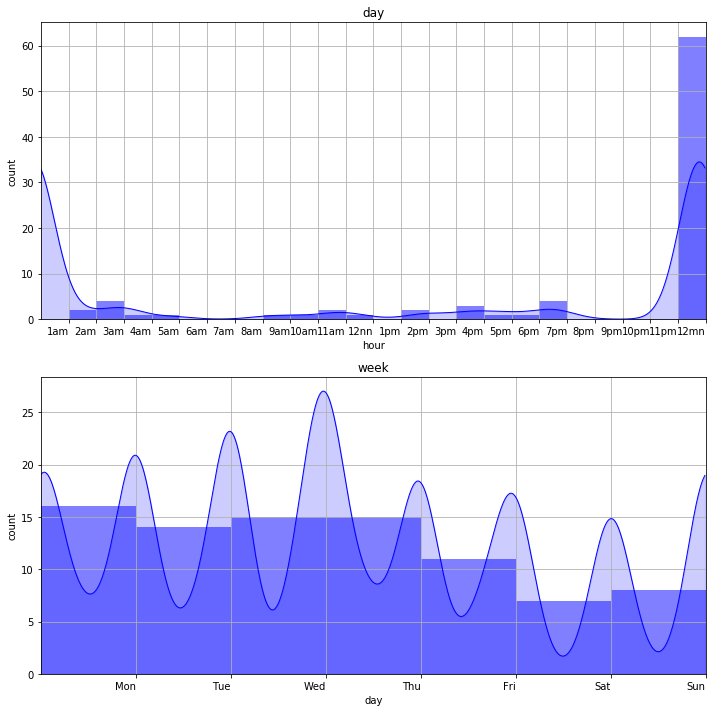

In [24]:
tss2.plot()

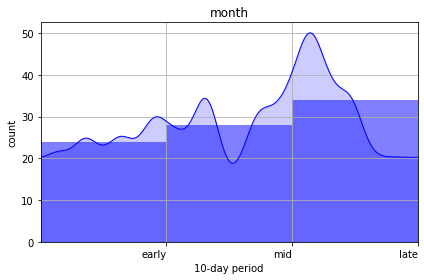

In [25]:
tss2.month.plot()